In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("江东快速路_15m.csv")
df.head()

,FID,Id,ORIG_FID,u,v,key,osmid,highway,oneway,length,...,name,ref,bridge,tunnel,junction,maxspeed,width,access,DSM_草场,nj_dsm
0,0,0,0,4020806582,8201270621,0,254608636,trunk,True,518.292,...,江东快速路,,,,,,,,8,7
1,1,0,0,4020806582,8201270621,0,254608636,trunk,True,518.292,...,江东快速路,,,,,,,,8,7
2,2,0,0,4020806582,8201270621,0,254608636,trunk,True,518.292,...,江东快速路,,,,,,,,8,7
3,3,0,0,4020806582,8201270621,0,254608636,trunk,True,518.292,...,江东快速路,,,,,,,,8,7
4,4,0,0,4020806582,8201270621,0,254608636,trunk,True,518.292,...,江东快速路,,,,,,,,8,7


<AxesSubplot:xlabel='FID'>

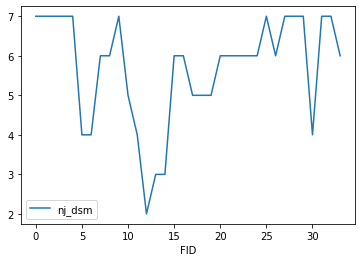

In [3]:
df.plot(x = "FID", y = "nj_dsm")

In [4]:
nj_dsm = df.nj_dsm
mean = nj_dsm.mean()
mean

5.705882352941177

In [5]:
median = nj_dsm.median()
median

6.0

## 修正

In [6]:
def find_near(median,nj_dsm_list,k):
    i = k 
    j = k 
    while i>0:
        if abs(nj_dsm_list[i] - median) >= 2:
            i -= 1
        else:
            break
    while j<len(nj_dsm_list)-1:
        if nj_dsm_list[j] - median >= 2:
            j += 1
        else:
            break
    if abs(nj_dsm_list[i] - median) <= abs(nj_dsm_list[j] - median):
        return i
    else:
        return j

In [7]:
def find_near_mad(dsm_list,df_column,k):
    """_summary_

    Args:
        df_column (_type_): _description_
        k (_type_): _description_

    Returns:
        _type_: _description_
    """
    mad_var = mad(df_column)
    i = k 
    j = k 
    while i>0:
        if abs(dsm_list[i] - median) >= mad_var:
            i -= 1
        else:
            break
    while j<len(dsm_list)-1:
        if dsm_list[j] - median >= mad_var:
            j += 1
        else:
            break
    if abs(dsm_list[i] - median) <= abs(dsm_list[j] - median):
        return i
    else:
        return j


In [8]:
def remove_mutation(dsm_list):
    for i in range(1,len(dsm_list)-1):
        if dsm_list[i] > dsm_list[i-1] and dsm_list[i] > dsm_list[i+1]:
            dsm_list[i] = dsm_list[i-1]
        elif dsm_list[i] < dsm_list[i-1] and dsm_list[i] < dsm_list[i+1]:
            dsm_list[i] = dsm_list[i-1]
    return dsm_list

In [9]:
def modify(dsm_list,median):
    for i in range(0,len(dsm_list)):
        if abs(dsm_list[i] - median) >= 2:
            dsm_list[i] = dsm_list[find_near(median,dsm_list,i)]
    return dsm_list

In [10]:
def modify2(dsm_list,median):
    """去除极值点

    Args:
        dsm_list (_type_): _description_
        median (_type_): _description_

    Returns:
        _type_: _description_
    """
    for i in range(0,len(dsm_list)):
        if abs(dsm_list[i] - median) >= 2:
            dsm_list[i] = dsm_list[find_near(median,dsm_list,i)]
    return remove_mutation(dsm_list)

In [11]:
def mad(df_column,n = 1):
    median = df_column.median()
    median_list = []
    df_list = df_column.to_list()
    for x in df_list:
      median_list.append(abs(x - median))
    mad = np.median(median_list)
    print("mad: ",mad)
    return mad * n

In [12]:
def modify3(df_column,median,n = 1):
    """利用mad进行修正"""
    dsm_list = df_column.to_list()
    for i in range(0,len(dsm_list)):
        if dsm_list[i]>median+mad(df_column,n):
             dsm_list[i] = median+mad(df_column,n)
        elif dsm_list[i]< median-mad(df_column,n):
            dsm_list[i] = median-mad(df_column,n)
        else:
            pass
    return dsm_list

In [13]:
def modify4(df_column,n = 1):
    """利用mad与最近邻符合条件的值进行修正"""
    dsm_list = df_column.to_list()
    median = df_column.median()
    for i in range(0,len(dsm_list)):
        if dsm_list[i]>median+mad(df_column,n) or dsm_list[i]< median-mad(df_column,n):
             dsm_list[i] = dsm_list[find_near_mad(dsm_list,df_column,i)]
        else:
            pass
    return dsm_list

In [14]:
def modify_bridge(dsm_list,median,threshold):
    for i in range(0,len(dsm_list)):
        if abs(dsm_list[i] - median) >= threshold:
            dsm_list[i] = dsm_list[find_near(median,dsm_list,i)]
    return remove_mutation(dsm_list)

### 江东快速路

mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0


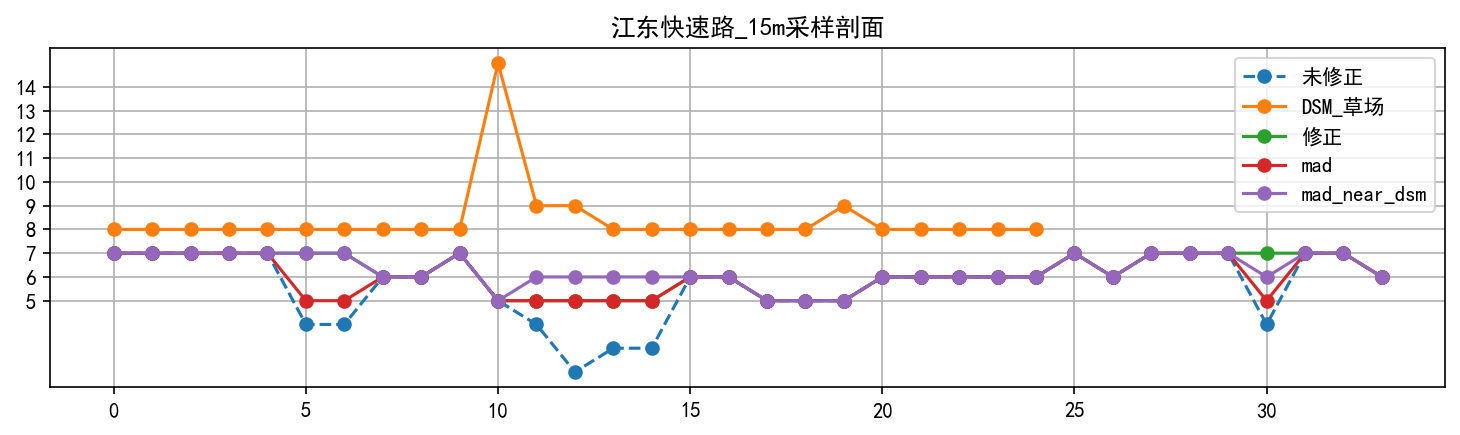

In [15]:
plt.rcParams['font.family']=['SimHei']
plt.figure(figsize=(12,3),dpi=150)
plt.title('江东快速路_15m采样剖面')
nj_dsm_list = df.nj_dsm.tolist()
modity_dsm = modify(nj_dsm_list,median)

df1=df[~df['DSM_草场'].isin([-9999])]
plt.plot(df.FID,df.nj_dsm,'--',marker = 'o')
plt.plot(df1.FID, df1["DSM_草场"],marker = 'o')
plt.plot(df.FID,modity_dsm,marker = 'o')

mad_dsm = modify3(df.nj_dsm,median)
mad_near_dsm = modify4(df.nj_dsm)
plt.plot(df.FID,mad_dsm,marker = 'o')
plt.plot(df.FID,mad_near_dsm,marker = 'o')

plt.legend(["未修正","DSM_草场","修正","mad","mad_near_dsm"])   
my_y_ticks = np.arange(5, 15,1)
plt.grid()
plt.yticks(my_y_ticks)
plt.show()

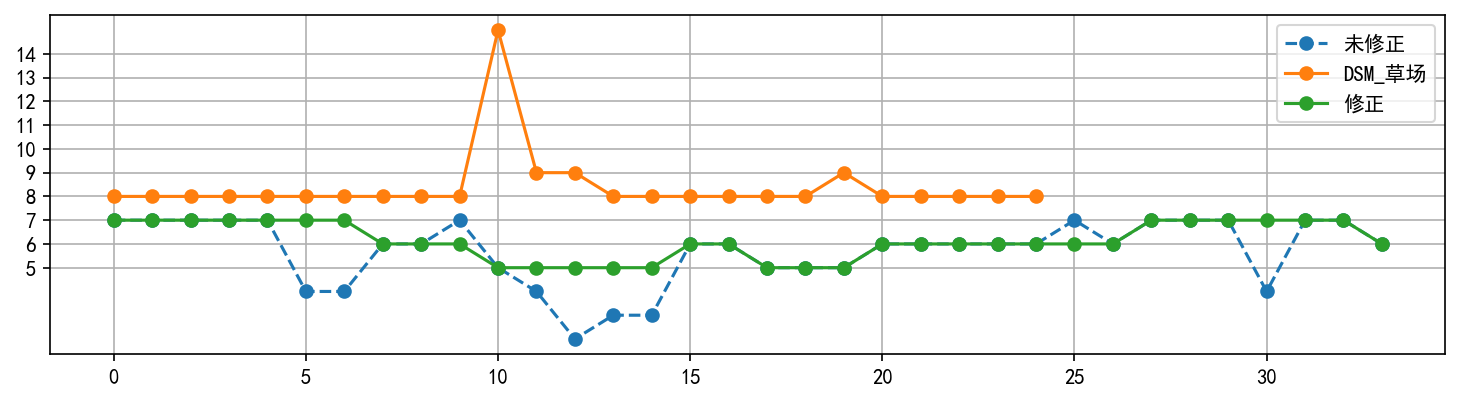

In [16]:
plt.figure(figsize=(12,3),dpi=150)
nj_dsm_list = df.nj_dsm.tolist()
modity_dsm = modify2(nj_dsm_list,median)
df1=df[~df['DSM_草场'].isin([-9999])]
plt.rcParams['font.family']=['SimHei']
plt.plot(df.FID,df.nj_dsm,'--',marker = 'o')
plt.plot(df1.FID, df1["DSM_草场"],marker = 'o')
plt.plot(df.FID,modity_dsm,marker = 'o')
plt.legend(["未修正","DSM_草场","修正"])   
my_y_ticks = np.arange(5, 15,1)
plt.grid()
plt.yticks(my_y_ticks)
plt.show()

### 草场门大街

In [17]:
cao_chang_df1 = pd.read_excel("草场门大街1_Points.xls")
cao_chang_df1_1 = pd.read_excel("草场门大街1_1_Points.xls")

median: 11.0
mad:  4.0
mad:  4.0
mad:  4.0
mad:  4.0
mad:  4.0
mad:  4.0
mad:  4.0
mad:  4.0
mad:  4.0
mad:  4.0
mad:  4.0
mad:  4.0
mad:  4.0
mad:  4.0
mad:  4.0
mad:  4.0
mad:  4.0
mad:  4.0
mad:  4.0
mad:  4.0
mad:  4.0
mad:  4.0
mad:  4.0
mad:  4.0
mad:  4.0
mad:  4.0
mad:  4.0
mad:  4.0
mad:  4.0
mad:  4.0
mad:  4.0
mad:  4.0
mad:  4.0
mad:  4.0
mad:  4.0
mad:  4.0
mad:  4.0
mad:  4.0
mad:  4.0
mad:  4.0
mad:  4.0
mad:  4.0
mad:  4.0
mad:  4.0
mad:  4.0
mad:  4.0
mad:  4.0
mad:  4.0
mad:  4.0
mad:  4.0


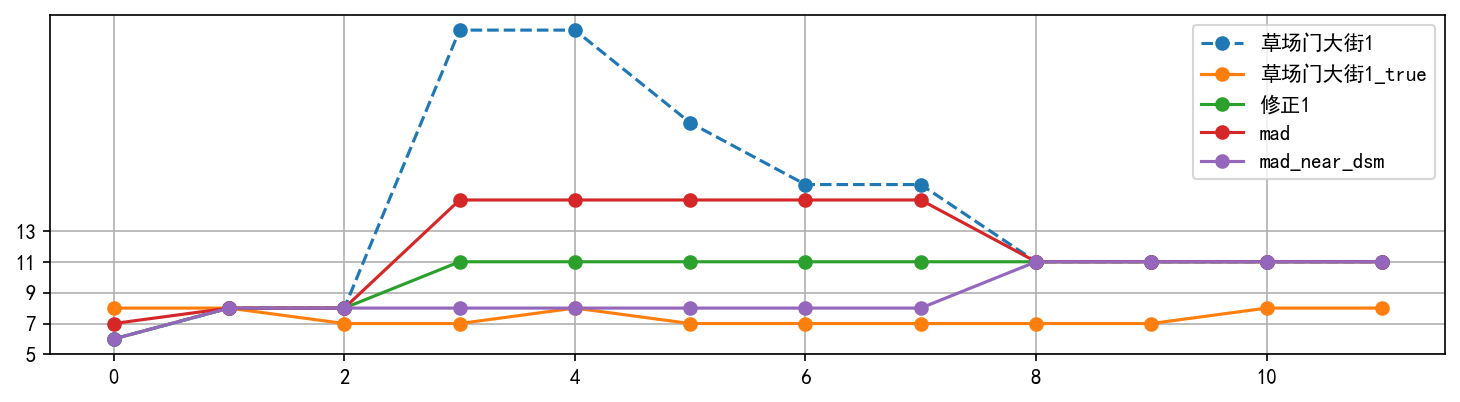

In [18]:
plt.figure(figsize=(12,3),dpi=150)
cao_chang1_dsm_list = cao_chang_df1.nj_dsm.tolist()
cao_chang1_dsm_modify = modify(cao_chang1_dsm_list,median = cao_chang_df1.nj_dsm.median())
print("median:",cao_chang_df1.nj_dsm.median())
plt.plot(cao_chang_df1.FID, cao_chang_df1["nj_dsm"],'--',  marker = 'o')
plt.plot(cao_chang_df1.FID, cao_chang_df1["DSM_草场"],marker = 'o')
plt.plot(cao_chang_df1.FID, cao_chang1_dsm_modify,marker = 'o')

cao_mad_dsm = modify3(cao_chang_df1.nj_dsm,cao_chang_df1.nj_dsm.median())
cao_mad_near_dsm = modify4(cao_chang_df1.nj_dsm)

plt.plot(cao_chang_df1.FID,cao_mad_dsm,marker = 'o')
plt.plot(cao_chang_df1.FID,cao_mad_near_dsm,marker = 'o')

plt.legend(["草场门大街1","草场门大街1_true","修正1","mad","mad_near_dsm"])
my_y_ticks = np.arange(5, 15,2)
plt.grid()
plt.yticks(my_y_ticks)
plt.show()

median: 10.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0
mad:  1.0


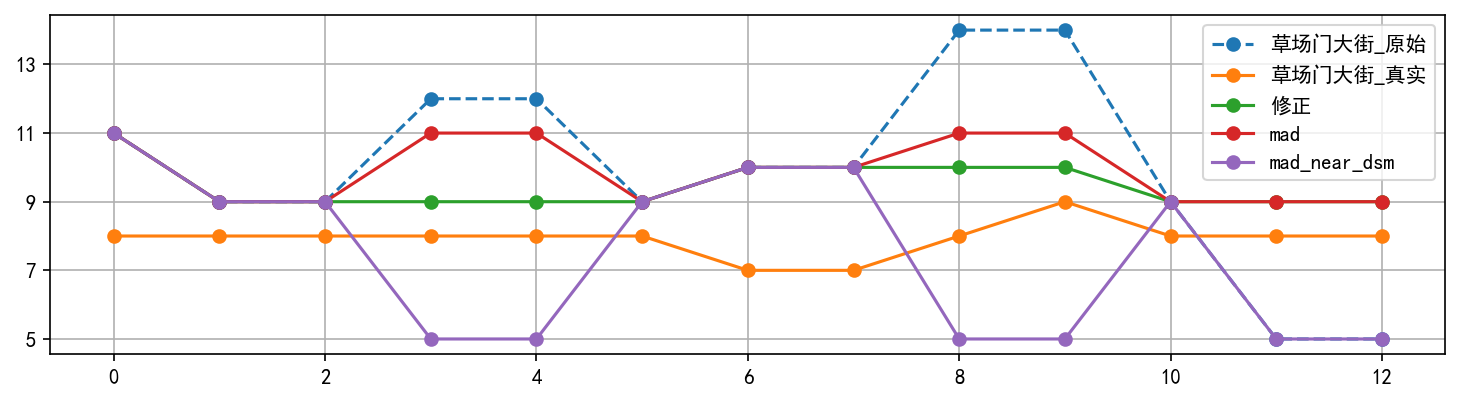

In [19]:
plt.figure(figsize=(12,3),dpi=150)
cao_chang1_1_dsm_list = cao_chang_df1_1.nj_dsm.tolist()
cao_chang1_1_dsm_modify = modify(cao_chang1_1_dsm_list,cao_chang_df1_1.nj_dsm.median())
print("median:",cao_chang_df1_1.nj_dsm.median())
plt.plot(cao_chang_df1_1.FID, cao_chang_df1_1["nj_dsm"],'--', marker = 'o')
plt.plot(cao_chang_df1_1.FID, cao_chang_df1_1["DSM_草场"], marker = 'o')
plt.plot(cao_chang_df1_1.FID, cao_chang1_1_dsm_modify, marker = 'o')

cao11_mad_dsm = modify3(cao_chang_df1_1.nj_dsm,cao_chang_df1_1.nj_dsm.median())
cao11_mad_near_dsm = modify4(cao_chang_df1_1.nj_dsm)

plt.plot(cao_chang_df1_1.FID,cao11_mad_dsm,marker = 'o')
plt.plot(cao_chang_df1_1.FID,cao11_mad_near_dsm,marker = 'o')

plt.legend(["草场门大街_原始","草场门大街_真实","修正","mad","mad_near_dsm"]) 
my_y_ticks = np.arange(5, 15, 2)
plt.grid()
plt.yticks(my_y_ticks)
plt.show()

### 草场门大街2

In [20]:
cao_df2 = pd.read_excel("草场门大街2_Points.xls")
cao_df2_1 = pd.read_excel("草场门大街2_1_Points.xls")

median: 7.0


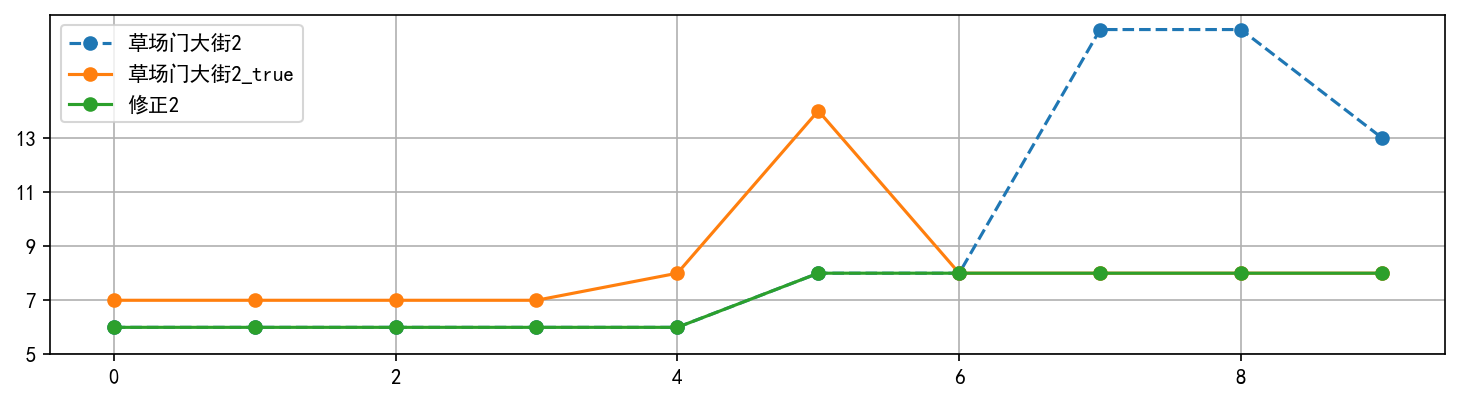

In [21]:
plt.figure(figsize=(12,3),dpi=150)
cao_2_dsm_list = cao_df2.nj_dsm.tolist()
cao_2_dsm_modify = modify(cao_2_dsm_list,median = cao_df2.nj_dsm.median())
print("median:",cao_df2.nj_dsm.median())
plt.plot(cao_df2.FID, cao_df2["nj_dsm"],'--',  marker = 'o')
plt.plot(cao_df2.FID, cao_df2["DSM_草场"],marker = 'o')
plt.plot(cao_df2.FID, cao_2_dsm_modify,marker = 'o')
plt.legend(["草场门大街2","草场门大街2_true","修正2"])
my_y_ticks = np.arange(5, 15, 2)
plt.grid()
plt.yticks(my_y_ticks) 
plt.show()

median: 11.0


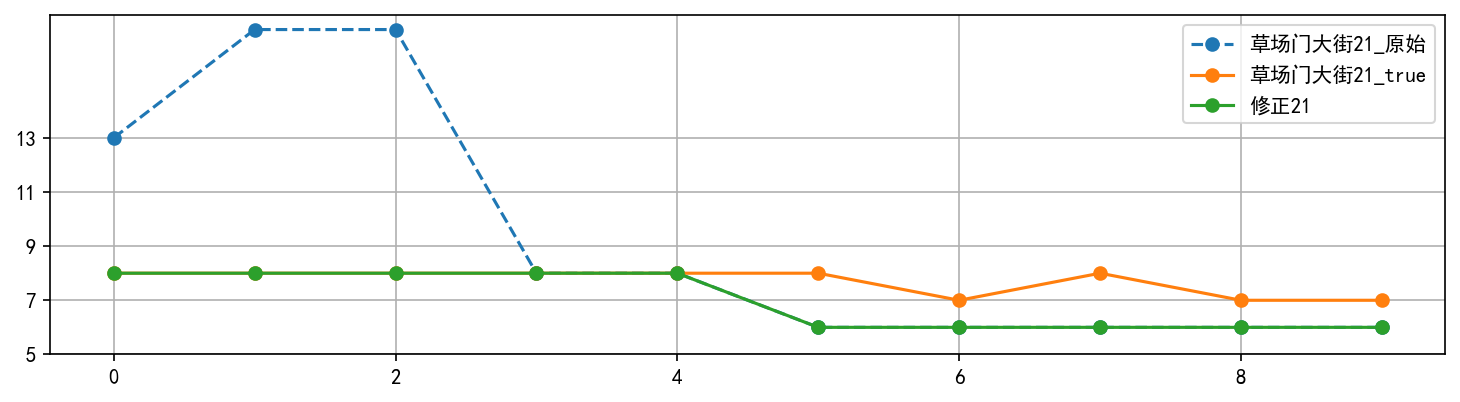

In [22]:
plt.figure(figsize=(12,3),dpi=150)
cao_21_dsm_list = cao_df2_1.nj_dsm.tolist()
cao_21_dsm_modify = modify(cao_21_dsm_list,median = cao_df2_1.nj_dsm.median())
print("median:",cao_chang_df1.nj_dsm.median())
plt.plot(cao_df2_1.FID, cao_df2_1["nj_dsm"],'--',  marker = 'o')
plt.plot(cao_df2_1.FID, cao_df2_1["DSM_草场"],marker = 'o')
plt.plot(cao_df2_1.FID, cao_21_dsm_modify,marker = 'o')
plt.legend(["草场门大街21_原始","草场门大街21_true","修正21"]) 
my_y_ticks = np.arange(5, 15, 2)
plt.grid()
plt.yticks(my_y_ticks) 
plt.show()

### 龙园东路

In [23]:
long_df2 = pd.read_excel("龙园东路.xls")

median: 11.0


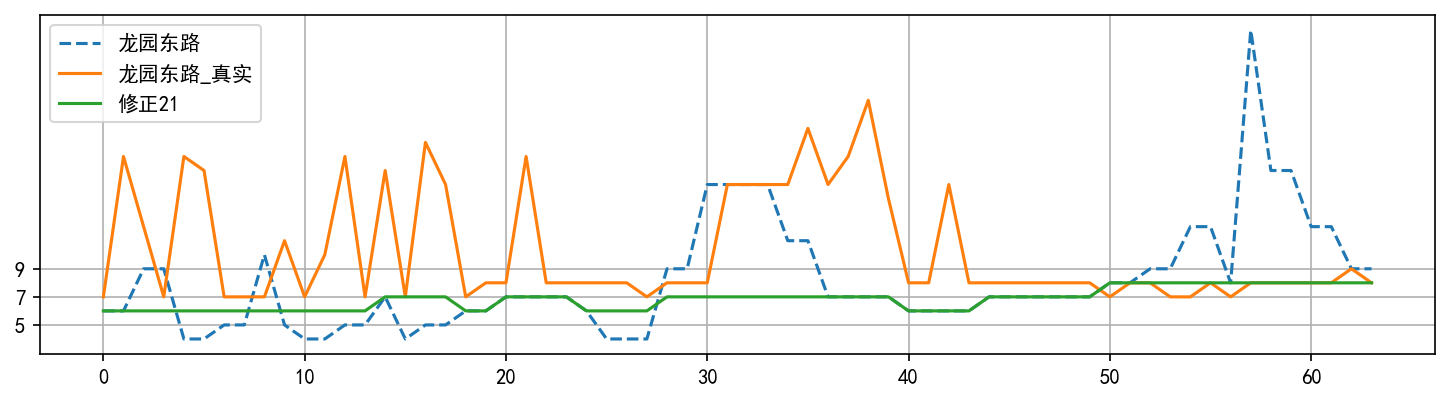

In [24]:
plt.figure(figsize=(12,3),dpi=150)
long_dsm_list = long_df2.nj_dsm.tolist()
long_21_dsm_modify = modify(long_dsm_list,median = long_df2.nj_dsm.median())
print("median:",cao_chang_df1.nj_dsm.median())

plt.plot(long_df2.FID, long_df2["nj_dsm"],'--')
plt.plot(long_df2.FID, long_df2["DSM_草场"])
plt.plot(long_df2.FID, long_21_dsm_modify)

plt.legend(["龙园东路","龙园东路_真实","修正21"]) 
my_y_ticks = np.arange(5, 10, 2)
plt.grid()
plt.yticks(my_y_ticks) 
plt.show()

### 草场门大桥

In [25]:
cao_bridge_df = pd.read_excel("草场门大桥1_Points.xls")

median: 11.0


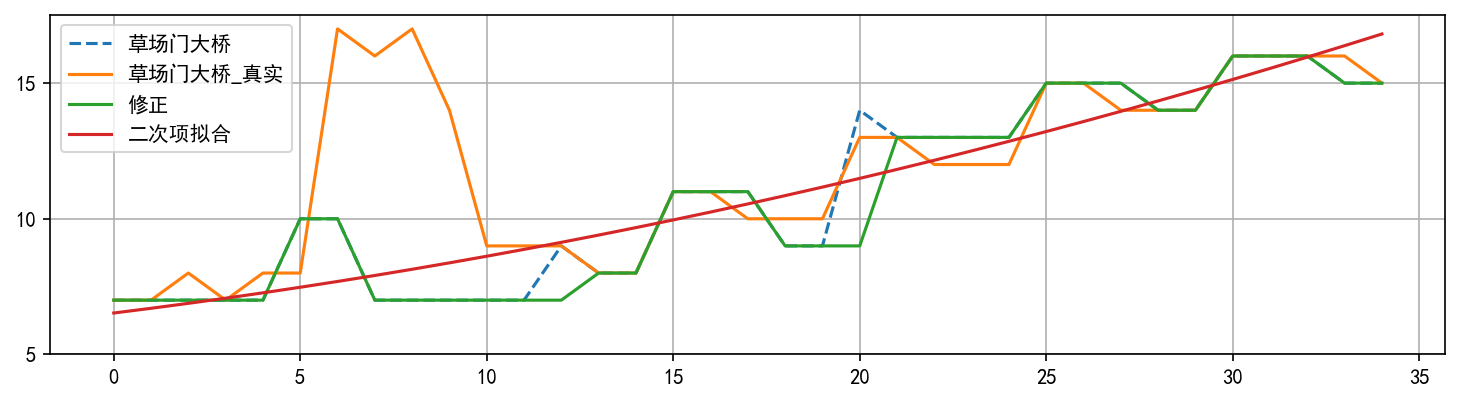

In [27]:
plt.figure(figsize=(12,3),dpi=150)
cao_bridge_df_list = cao_bridge_df.nj_dsm.tolist()
cao_bridge_df_modify = modify_bridge(cao_bridge_df_list,cao_bridge_df.nj_dsm.median(),6)
print("median:",cao_chang_df1.nj_dsm.median())

z1=np.polyfit(cao_bridge_df.FID,cao_bridge_df["nj_dsm"],2)
p1=np.poly1d(z1)
yvals = p1(cao_bridge_df.FID)

plt.plot(cao_bridge_df.FID, cao_bridge_df["nj_dsm"],'--')
plt.plot(cao_bridge_df.FID, cao_bridge_df["DSM_草场"])
plt.plot(cao_bridge_df.FID, cao_bridge_df_modify)
plt.plot(cao_bridge_df.FID,yvals)

plt.legend(["草场门大桥","草场门大桥_真实","修正","二次项拟合"]) 
my_y_ticks = np.arange(5, 20, 5)
plt.grid()
plt.yticks(my_y_ticks) 
plt.show()